# Analysis of corpus files

In [1]:
import os
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD


class Corpus:
    def __init__(self, corpus_dir):
        self._corpus_dir = corpus_dir

    def __iter__(self):
        for file_name in self._get_file_names():
            try:
                yield self._get_file_text(file_name)
            except json.decoder.JSONDecodeError:
                continue
            except TypeError:
                continue

    def _get_file_names(self):
        for root, dirs, files in os.walk(self._corpus_dir):
            for f in files:
                yield os.path.join(root, f)

    def _get_file_text(self, file_name):
        text = []
        with open(file_name, 'rt') as f:
            data = json.load(f)
            for section in data['body']:
                text.append(section['title'])
                text.append(section['text'])
            return '\n'.join(text)


corpus_dir = input('Corpus directory:')


## Truncated Singular Value Decomposition on Bag of Words

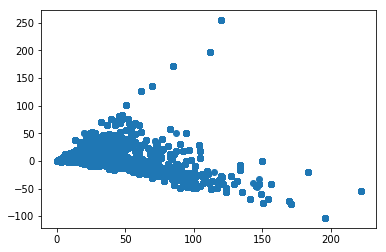

In [2]:
corpus = Corpus(corpus_dir)

count_vectorizer = CountVectorizer(stop_words='english')
bow = count_vectorizer.fit_transform(corpus)

t_svd = TruncatedSVD()
t_svd.fit(bow)
bow = t_svd.transform(bow)
x, y = ([_x for _x, _y in bow], [_y for _x, _y in bow])

plt.scatter(x, y)
plt.show()


## Truncated Singular Value Decomposition on TF-IDF

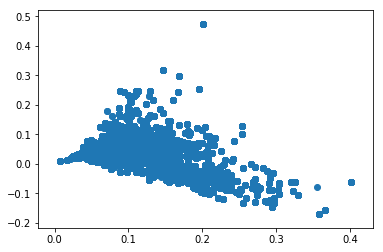

In [3]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)

tfidf_tsvd = t_svd.transform(tfidf)
x, y = ([_x for _x, _y in tfidf_tsvd], [_y for _x, _y in tfidf_tsvd])
plt.clf()
plt.scatter(x, y)
plt.show()
